In [140]:
import os

# Change the current working directory
os.chdir('/Users/payalteyung/Desktop/DA')

# Verify the change
print(os.getcwd())

/Users/payalteyung/Desktop/DA


In [141]:
import warnings
warnings.filterwarnings('ignore')

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import sparse as sp
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
%matplotlib inline

In [142]:
df= pd.read_csv("hindi_news_dataset.csv",encoding='utf-8')

In [143]:
df.head()

,Headline,Content,News Categories,Date
0,कांग्रेस नेता बलजिंदर सिंह की पंजाब में घर के ...,कांग्रेस नेता बलजिंदर सिंह की सोमवार को पंजाब ...,['national'],19-09-2023
1,केंद्रीय मंत्री बोले- महिला आरक्षण लाने का साह...,केंद्रीय मंत्री प्रह्लाद पटेल ने लोकसभा और विध...,"['politics', 'national']",19-09-2023
2,ओपीएस लागू करने से अस्थिर हो सकती है राज्यों क...,आरबीआई के 5 अधिकारियों ने एक लेख में लिखा है क...,"['business', 'national']",19-09-2023
3,तमिलनाडु में शावरमा खाने से 14 वर्षीय छात्रा क...,नामक्कल (तमिलनाडु) में शावरमा खाने से सोमवार क...,['national'],19-09-2023
4,मणिपुर में मुख्यमंत्री के आश्वासन के बाद मारे ...,मणिपुर के मुख्यमंत्री एन बीरेन सिंह के आश्वासन...,['national'],19-09-2023


In [144]:
#number of rows and colums
df.shape

(185512, 4)

In [145]:
#the datatypes of the fileds
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185512 entries, 0 to 185511
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Headline         185512 non-null  object
 1   Content          185512 non-null  object
 2   News Categories  185512 non-null  object
 3   Date             185512 non-null  object
dtypes: object(4)
memory usage: 5.7+ MB


In [146]:
df.describe()

,Headline,Content,News Categories,Date
count,185512,185512,185512,185512
unique,34748,34811,301,83
top,आज ही के दिन क्यों मनाया जाता है नैशनल इंजीनिय...,जैसलमेर (राजस्थान) के जेठवाई-गजरूप सागर की पहा...,['entertainment'],2024-06-03
freq,70,70,19478,4466


# Data Cleaning

Handling missing data

In [147]:
df.isnull()

,Headline,Content,News Categories,Date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
185507,False,False,False,False
185508,False,False,False,False
185509,False,False,False,False
185510,False,False,False,False


In [148]:
df.isna().sum()

Headline           0
Content            0
News Categories    0
Date               0
dtype: int64

In [149]:
df['News Categories'] = df['News Categories'].astype(str)
df['Headline'] = df['Headline'].astype(str)

There is no missing data

In [150]:
df_duplicate = df.duplicated().any()
print(df_duplicate)

True


In [151]:
# Find all instances of duplicate rows
all_duplicates = df[df.duplicated(keep=False)]

In [152]:
print(all_duplicates)

                                                 Headline  \
1       केंद्रीय मंत्री बोले- महिला आरक्षण लाने का साह...   
2       ओपीएस लागू करने से अस्थिर हो सकती है राज्यों क...   
11      वर्ल्ड हेरिटेज साइट की सूची में शामिल हुए कर्न...   
30      जापानी राजदूत ने दिल्ली मेें खाई आलू टिक्की, क...   
75      राजस्थान में पीएम मोदी के जन्मदिन पर बांटे गए ...   
...                                                   ...   
185434  मार्क ज़करबर्ग ने घर के बैकयार्ड में लगाई पत्न...   
185452  होटल में हिडन कैमरे का पता लगाने के लिए किन-कि...   
185461  यूट्यूबर ने 12 दिनों तक लगातार जगकर की लाइवस्ट...   
185479  कनाडाई युवक ने इंस्टाग्राम व टिकटॉक पर किया के...   
185481  यूपी में झोपड़ियों में रह रहे लोगों को बांग्ला...   

                                                  Content  \
1       केंद्रीय मंत्री प्रह्लाद पटेल ने लोकसभा और विध...   
2       आरबीआई के 5 अधिकारियों ने एक लेख में लिखा है क...   
11      कर्नाटक के होयसल साम्राज्य के मंदिरों को सोमवा...   
30      भारत में जापान 

In [153]:
# Drop all instances of duplicate rows
df = df[~df.duplicated(keep=False)]

# Check the updated DataFrame
print(df)

                                                 Headline  \
0       कांग्रेस नेता बलजिंदर सिंह की पंजाब में घर के ...   
3       तमिलनाडु में शावरमा खाने से 14 वर्षीय छात्रा क...   
4       मणिपुर में मुख्यमंत्री के आश्वासन के बाद मारे ...   
5       लोकसभा और विधानसभाओं में महिलाओं को 33% आरक्षण...   
6       भारत के लिए गौरव की बात: होयसल मंदिरों के वर्ल...   
...                                                   ...   
185507  20 फीट लंबे विशालकाय अजगर के ऊपर लेटा दिखा इंड...   
185508  जयपुर के हाथी गांव में रहते हैं करीब 80 हाथी, ...   
185509  आज ही के दिन यूएस ने 1945 में जापान के नागासाक...   
185510  बांग्लादेश में अंतरिम सरकार के प्रमुख मोहम्मद ...   
185511  रैपर लिल वेन की लिखी हुई लिरिक्स नोटबुक होगी न...   

                                                  Content  \
0       कांग्रेस नेता बलजिंदर सिंह की सोमवार को पंजाब ...   
3       नामक्कल (तमिलनाडु) में शावरमा खाने से सोमवार क...   
4       मणिपुर के मुख्यमंत्री एन बीरेन सिंह के आश्वासन...   
5       रिपोर्ट्स के अन

In [154]:
df.shape[0]

158484

In [155]:
string_categories = df['News Categories'][df['News Categories'].apply(lambda x: isinstance(x, str))]
unique_string_categories = string_categories.nunique()
print(f"The total number of unique categories that are strings is: {unique_string_categories}")

The total number of unique categories that are strings is: 287


In [156]:
unique_categories = set(category for categories in df["News Categories"] for category in categories)

In [157]:
print(unique_categories)

{'3', 'l', '-', 'ज', 'v', 'औ', 'ड', ']', 'o', 'ए', 'र', '_', '2', 'स', 'ध', 'इ', 'ो', 'ओ', 'ॉ', 'म', 't', 'r', 'm', 'u', 'ु', 's', 'w', "'", 'h', 'ह', 'c', 'ा', '[', '्', 'i', 'y', 'ी', '़', 'व', 'प', 'ई', 'भ', 'न', 'च', 'd', 'a', 'g', 'े', 'ं', 'क', 'थ', 'श', 'य', 'p', 'आ', ' ', 'b', '4', 'ट', 'k', 'n', ',', 'ि', '0', 'ग', 'f', 'ल', 'ब', 'फ', 'e'}


In [158]:
# Convert string representations of lists to actual lists
import ast
df["News Categories"] = df["News Categories"].apply(ast.literal_eval)

In [159]:
unique_categories = set(category for categories in df["News Categories"] for category in categories)

In [160]:
print(unique_categories)

{'एक्सप्लेनर', 'automobile', 'technology', 'आईपीएल-_2024', 'fashion', 'national', 'miscellaneous', 'world', 'एजुकेशन_और_जॉब', 'आईपीएल_2024', 'एशिया_कप_2023', 'travel', 'entertainment', 'business', 'एशियन_गेम्स_2022', 'विधानसभा_चुनाव_2023', 'लोकसभा_चुनाव_2024', 'कोरोना_वायरस', 'विश्व_कप_2023', 'फील_गुड_स्टोरीज़', 'एजुकेशन', 'टी20_विश्व_कप_2024', 'startup', 'hatke', 'पेरिस_ओलंपिक्स', 'facts', 'फाइनेंस', 'हेल्थ_एंड_फिटनेस', 'आईपीएल_2023', 'sports', 'politics', 'बजट_2024', 'लोकसभा_चुनाव-_2024'}


In [161]:
# Explode the 'News Categories' column
df_exploded = df.explode("News Categories")

In [162]:
headline_counts = df_exploded.groupby("News Categories")["Headline"].count()

print(headline_counts)

News Categories
automobile               207
business               21493
entertainment          21379
facts                     10
fashion                   13
hatke                   1063
miscellaneous          21199
national               45410
politics               18805
sports                 22001
startup                   72
technology             20785
travel                    54
world                  21523
आईपीएल-_2024               6
आईपीएल_2023                6
आईपीएल_2024             5055
एक्सप्लेनर              4851
एजुकेशन                    3
एजुकेशन_और_जॉब            80
एशियन_गेम्स_2022        2202
एशिया_कप_2023            981
कोरोना_वायरस              91
टी20_विश्व_कप_2024      1392
पेरिस_ओलंपिक्स           710
फाइनेंस                  961
फील_गुड_स्टोरीज़          39
बजट_2024                 392
लोकसभा_चुनाव-_2024         5
लोकसभा_चुनाव_2024       3957
विधानसभा_चुनाव_2023      300
विश्व_कप_2023           3484
हेल्थ_एंड_फिटनेस         175
Name: Headline, dtype: int6

In [163]:
# Define categories to keep
categories_to_keep = {
    'Politics': ['national', 'politics', 'बजट_2024', 'लोकसभा_चुनाव-_2024', 'लोकसभा_चुनाव_2024', 'विधानसभा_चुनाव_2023', 
                 'business','world'],
    'Technology': ['technology','startup','फाइनेंस','एजुकेशन','एजुकेशन_और_जॉब','startup'],
    'Sports': ['sports','आईपीएल-_2024','आईपीएल_2023','आईपीएल_2024','एशियन_गेम्स_2022','एशिया_कप_2023','टी20_विश्व_कप_2024'
              'पेरिस_ओलंपिक्स','विश्व_कप_2023']
}

# Categorize and filter
def assign_main_category(categories):
    for category in categories:
        for key, values in categories_to_keep.items():
            if category.strip() in values:  # Strip any extra spaces
                return key
    return None

df['Main Category'] = df['News Categories'].apply(assign_main_category)
df_filtered = df.dropna(subset=['Main Category'])

# Separate data into specific categories
politics = df_filtered[df_filtered['Main Category'] == 'Politics']
sports = df_filtered[df_filtered['Main Category'] == 'Sports']
technology = df_filtered[df_filtered['Main Category'] == 'Technology']

# Print each category
print("Politics Categories:")
print(politics)

print("\nSports Categories:")
print(sports)

print("\nTech Categories:")
print(technology)

Politics Categories:
                                                 Headline  \
0       कांग्रेस नेता बलजिंदर सिंह की पंजाब में घर के ...   
3       तमिलनाडु में शावरमा खाने से 14 वर्षीय छात्रा क...   
4       मणिपुर में मुख्यमंत्री के आश्वासन के बाद मारे ...   
5       लोकसभा और विधानसभाओं में महिलाओं को 33% आरक्षण...   
6       भारत के लिए गौरव की बात: होयसल मंदिरों के वर्ल...   
...                                                   ...   
185489  यूपी के शख्स ने अपने शरीर पर गुदवाएं हैं 600 स...   
185492  अनंत अंबानी और राधिका मर्चेंट ने अपने हनीमून क...   
185494  गुरुग्राम में थार व स्कॉर्पियो से सड़क पर स्टं...   
185506  प्राइवेट पार्टी में डांस करते हुए पिस्टल लहरात...   
185509  आज ही के दिन यूएस ने 1945 में जापान के नागासाक...   

                                                  Content  \
0       कांग्रेस नेता बलजिंदर सिंह की सोमवार को पंजाब ...   
3       नामक्कल (तमिलनाडु) में शावरमा खाने से सोमवार क...   
4       मणिपुर के मुख्यमंत्री एन बीरेन सिंह के आश्वासन...   
5 

In [164]:
df = df[df['Main Category'].notna()]
df.shape[0]

121329

In [165]:
category_counts = df.groupby("Main Category").size()
print(category_counts)

Main Category
Politics      84218
Sports        21953
Technology    15158
dtype: int64


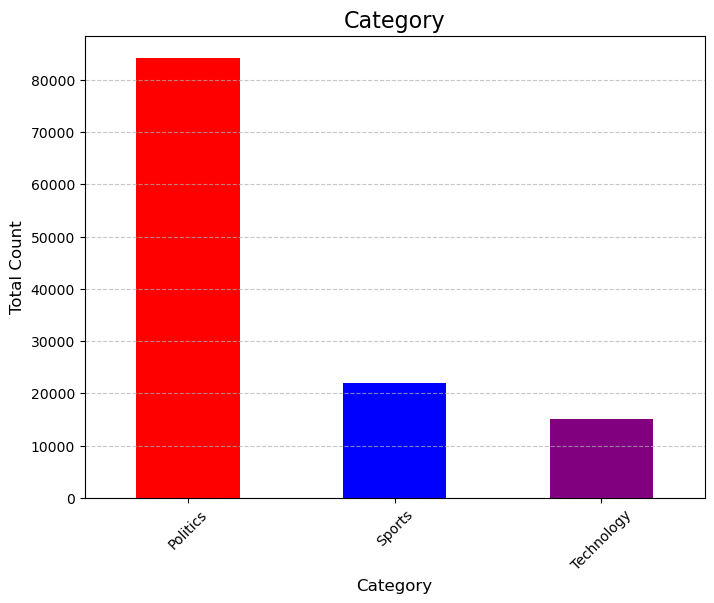

In [166]:
plt.figure(figsize=(8, 6))
category_counts.plot(kind="bar", color=["red", "blue", "purple"])
plt.title("Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [167]:
total_count = category_counts.sum()
category_percentages = (category_counts / total_count) * 100

In [168]:
sorted_categories = category_percentages.sort_values(ascending=False)

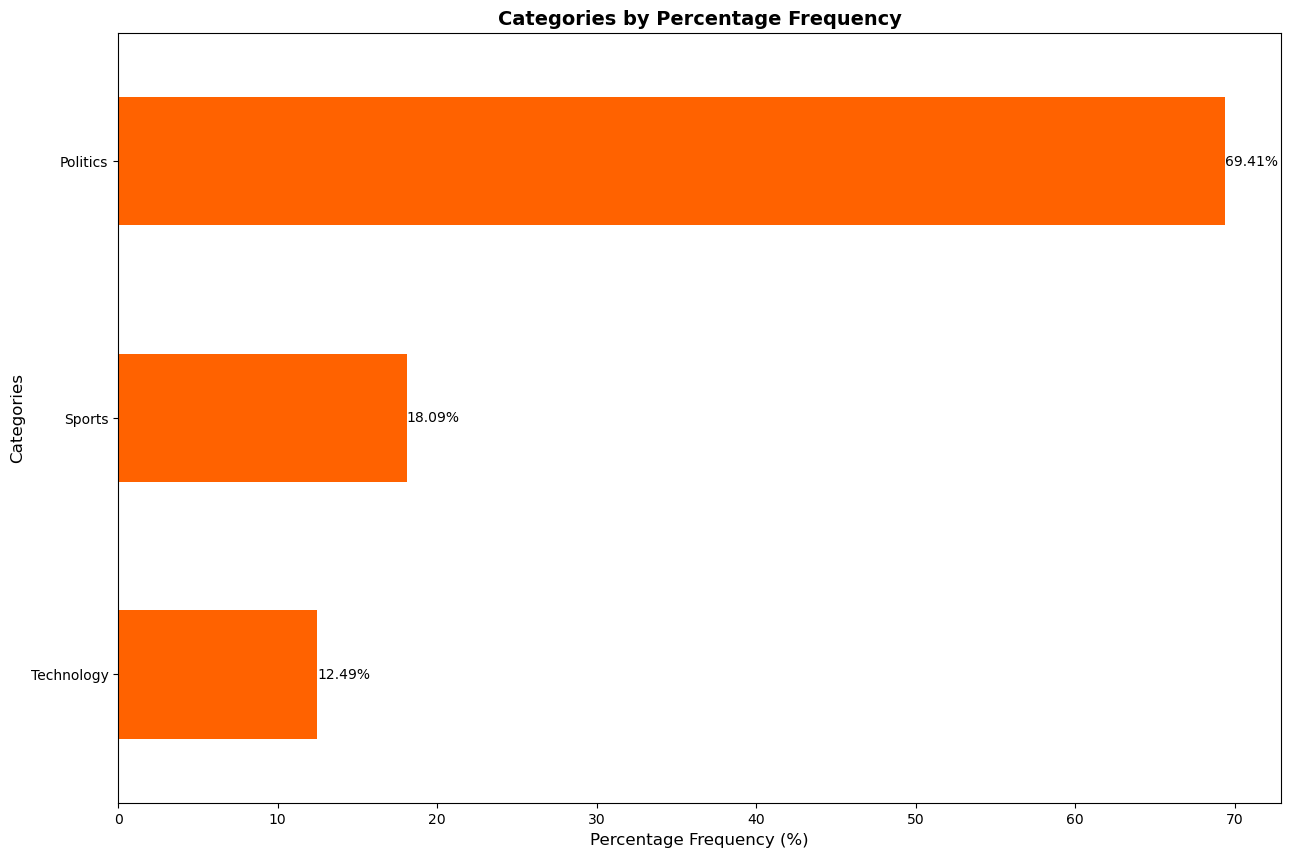

In [169]:
plt.figure(figsize=(15, 10))
sorted_categories.plot(kind='barh', color='#ff6200')
for index, value in enumerate(sorted_categories):
    plt.text(value, index, f'{value:.2f}%', fontsize=10, va='center')
plt.title('Categories by Percentage Frequency', fontsize=14, fontweight='bold')
plt.xlabel('Percentage Frequency (%)', fontsize=12)
plt.ylabel('Categories', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

# Exploratory Data Analysis(EDA)

In [170]:
# Convert 'Date' to datetime format 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [171]:
print("Date range:", df['Date'].min(), "to", df['Date'].max())

Date range: 2023-01-10 00:00:00 to 2024-08-26 00:00:00


In [172]:
##Articles over time
# Count articles per day
articles_per_day = df.groupby('Date').size()

In [173]:
print(articles_per_day)

Date
2023-01-10    1520
2023-02-10    1528
2023-03-10    1538
2023-04-10    1541
2023-05-10    1535
              ... 
2024-07-30    1458
2024-07-31    1458
2024-08-09    1422
2024-08-23    1400
2024-08-26    1369
Length: 82, dtype: int64


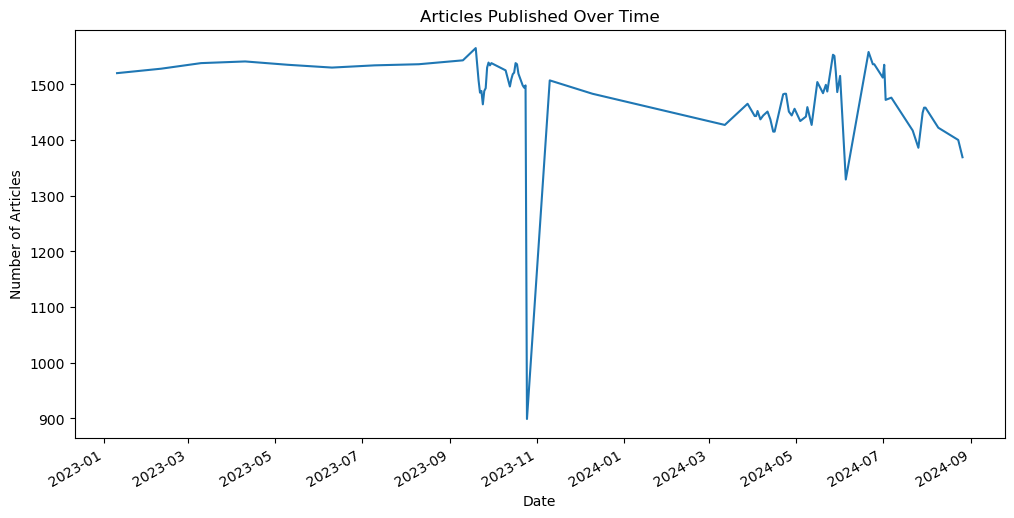

In [174]:
# Plot articles over time
articles_per_day.plot(figsize=(12, 6), title='Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

Headline and Content Analysis

In [175]:
#text length

# Calculate length of headlines and content
df['Headline Length'] = df['Headline'].str.len()
df['Content Length'] = df['Content'].str.len()

In [176]:
print("Headline length summary:")
print(df['Headline Length'].describe())
print("Content length summary:")
print(df['Content Length'].describe())

Headline length summary:
count    121329.000000
mean         76.772033
std          13.279524
min          22.000000
25%          70.000000
50%          80.000000
75%          87.000000
max         116.000000
Name: Headline Length, dtype: float64
Content length summary:
count    121329.000000
mean        312.997618
std          22.456969
min         177.000000
25%         298.000000
50%         312.000000
75%         327.000000
max         400.000000
Name: Content Length, dtype: float64


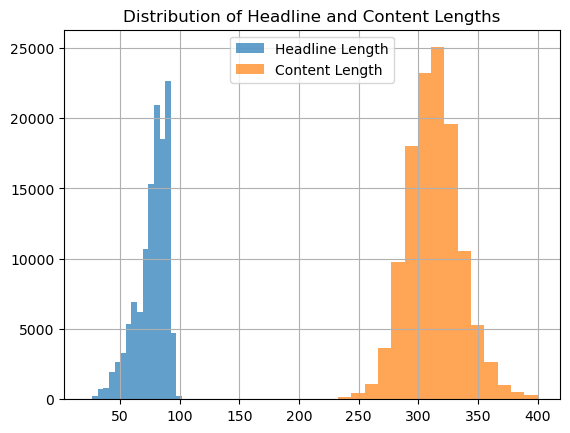

In [177]:
# Visualize length distributions
df['Headline Length'].hist(bins=20, alpha=0.7, label='Headline Length')
df['Content Length'].hist(bins=20, alpha=0.7, label='Content Length')
plt.legend()
plt.title('Distribution of Headline and Content Lengths')
plt.show()

Word Frequency

In [178]:
!pip install wordcloud


In [179]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/payalteyung/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [180]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/payalteyung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/payalteyung/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [181]:
from collections import Counter
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
font_path ='/Users/payalteyung/Downloads/Noto_Sans_Devanagari/NotoSansDevanagari-VariableFont_wdth,wght.ttf'
import matplotlib.font_manager as fm

In [182]:
hindi_stopwords = set([
    'और', 'की', 'में', 'का', 'के', 'है', 'हैं', 'मैं', 'पर', 'यह', 'वह', 'हम', 'आप', 'तुम', 'जैसा', 'अधिक',
    'किंतु', 'यदि', 'तो', 'क्या', 'क्यों', 'रहा', 'रही', 'सकते', 'सकती', 'हुए', 'उनका', 'इस', 'उनकी', 'केवल',
    'कि', 'जो', 'कर', 'अपने', 'अपनी', 'कुछ', 'को', 'इन', 'होता', 'करते', 'करता', 'होती', 'से', 'ने', 'एक',
    'जब', 'होने', 'बाद', 'वाले', 'वाली', 'वाला', 'भी', 'या', 'हो','खबर', 'समाचार', 'ताजा', 'लाइव', 'ब्रेकिंग', 'न्यूज़', 'रिपोर्ट', 'बताया', 'कहा', 'मामला', 'विशेष',
    'अपडेट', 'देखें', 'पढ़ें', 'जानें', 'बड़ी', 'आज', 'कल', 'अभी', 'फिर', 'साथ', 'बाद', 'पहले', 'दौरान',
    'द्वारा', 'लिए', 'गया', 'गयी', 'करने', 'किया', 'होने', 'बारे', 'साल', 'दिन', 'वाले', 'वाली','एक', 'दो', 'तीन', 'चार', 'पांच', 'छह', 'सात', 'आठ', 'नौ', 'दस',
    'सोमवार', 'मंगलवार', 'बुधवार', 'गुरुवार', 'शुक्रवार', 'शनिवार', 'रविवार'])    

In [183]:
font_prop = fm.FontProperties(fname=font_path)
all_headlines = ' '.join(df['Headline'].fillna('').astype(str))
tokens = word_tokenize(all_headlines)

In [184]:
# Clean tokens and calculate frequencies
tokens_cleaned = [
    word for word in tokens
    if (word not in hindi_stopwords and 
        word not in string.punctuation and
        len(word) >= 2 and
        not any(char.isdigit() for char in word))
]

In [185]:
word_freq = Counter(tokens_cleaned)

In [186]:
# Get top words for analysis
top_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:30])

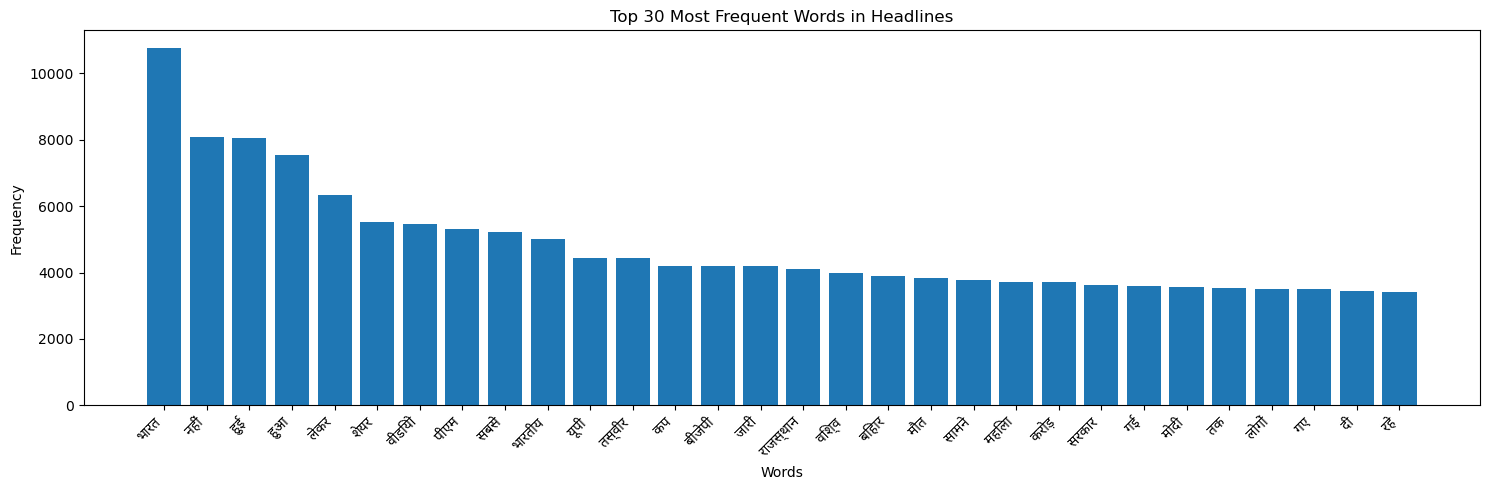

In [187]:
# Create bar plot of top words
plt.figure(figsize=(15, 5))
plt.bar(range(len(top_words)), list(top_words.values()))
plt.xticks(range(len(top_words)), list(top_words.keys()), rotation=45, ha='right',fontproperties=font_prop)
plt.title('Top 30 Most Frequent Words in Headlines')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [188]:
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='viridis',
    max_words=100,
    collocations=False,
    prefer_horizontal=0.7
).generate_from_frequencies(word_freq)

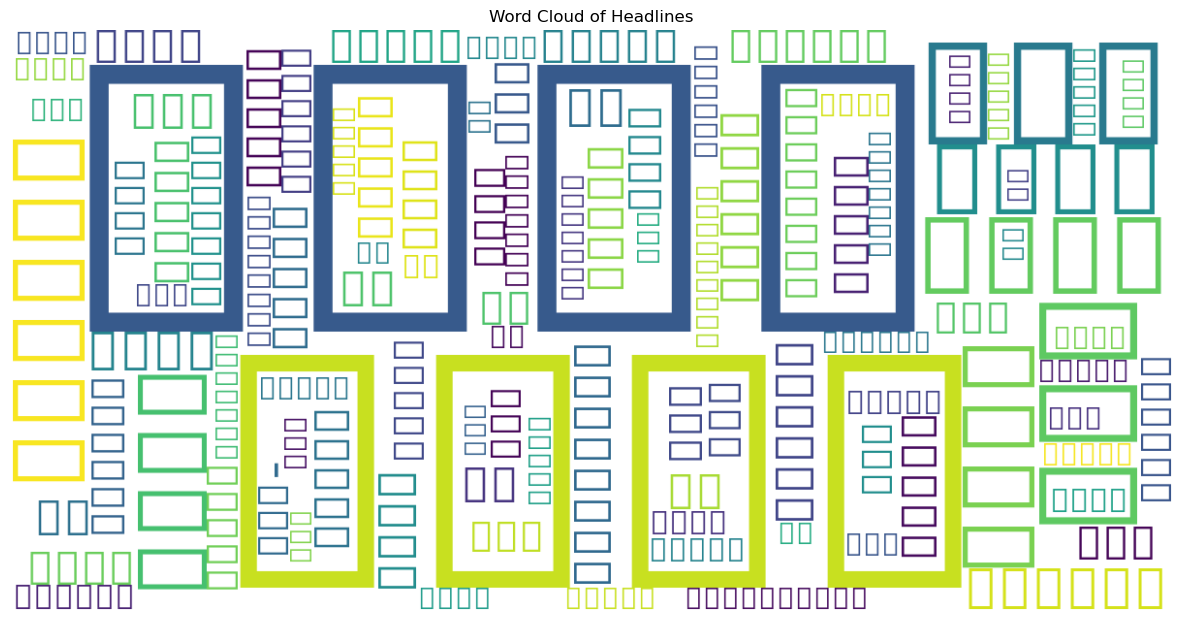

In [189]:
# Plot word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Headlines')
plt.show()

In [190]:
print(f"Total unique words: {len(word_freq)}")
print(f"\nTop 10 most frequent words:")
for word, freq in list(top_words.items())[:10]:
    print(f"{word}: {freq}")

Total unique words: 21855

Top 10 most frequent words:
भारत: 10761
नहीं: 8086
हुई: 8045
हुआ: 7545
लेकर: 6337
शेयर: 5522
वीडियो: 5478
पीएम: 5304
सबसे: 5219
भारतीय: 5025


News Categories VS Date Analysis
(Articles Per Category Over Time:)

In [191]:
df.head()

,Headline,Content,News Categories,Date,Main Category,Headline Length,Content Length
0,कांग्रेस नेता बलजिंदर सिंह की पंजाब में घर के ...,कांग्रेस नेता बलजिंदर सिंह की सोमवार को पंजाब ...,[national],2023-09-19,Politics,73,288
3,तमिलनाडु में शावरमा खाने से 14 वर्षीय छात्रा क...,नामक्कल (तमिलनाडु) में शावरमा खाने से सोमवार क...,[national],2023-09-19,Politics,74,300
4,मणिपुर में मुख्यमंत्री के आश्वासन के बाद मारे ...,मणिपुर के मुख्यमंत्री एन बीरेन सिंह के आश्वासन...,[national],2023-09-19,Politics,88,308
5,लोकसभा और विधानसभाओं में महिलाओं को 33% आरक्षण...,"रिपोर्ट्स के अनुसार, केंद्रीय कैबिनेट ने सोमवा...",[national],2023-09-19,Politics,96,343
6,भारत के लिए गौरव की बात: होयसल मंदिरों के वर्ल...,कर्नाटक के होयसल साम्राज्य के मंदिरों को यूनेस...,[national],2023-09-19,Politics,92,309


In [192]:
df_exploded = df.explode('Main Category')
# Count articles per category per date
category_date_counts = df_exploded.groupby(['Date', 'Main Category']).size().unstack(fill_value=0)

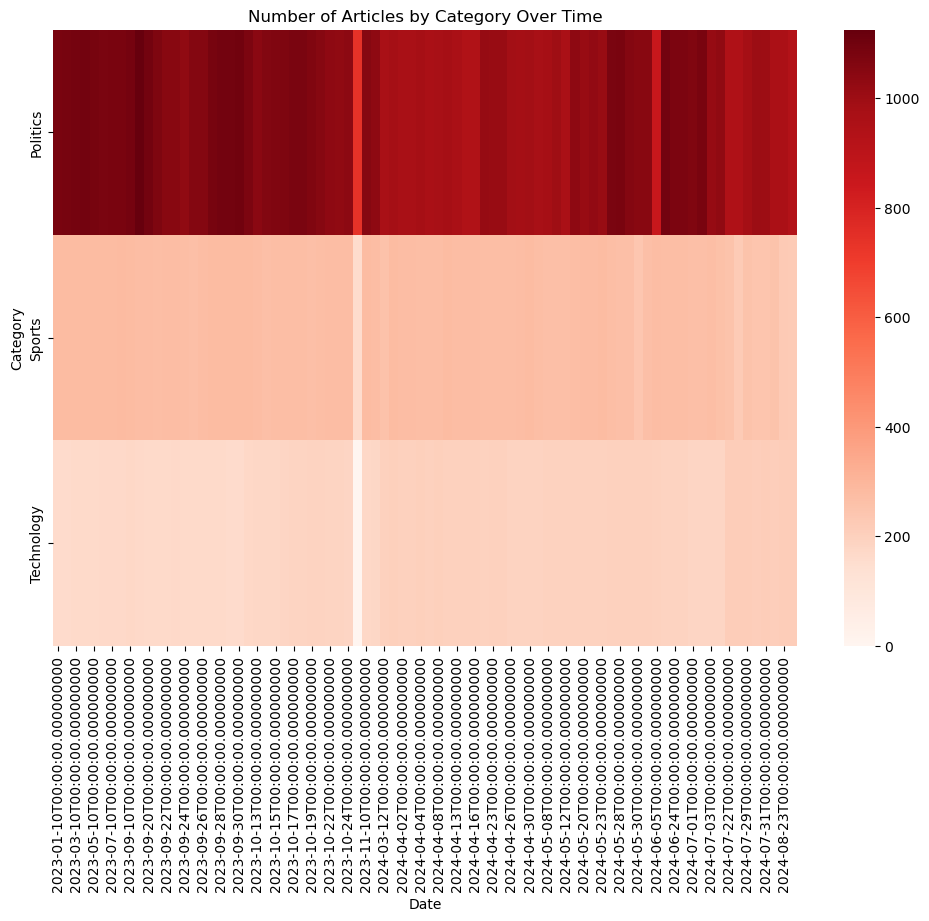

In [193]:
plt.figure(figsize=(12, 8))
sns.heatmap(category_date_counts.T, cmap='Reds', cbar=True)
plt.title('Number of Articles by Category Over Time')
plt.xlabel('Date')
plt.ylabel('Category')
plt.show()

Correlation Analysis(Correlation Between Categories:)

In [194]:
# Create a pivot table for category correlations
category_correlation = category_date_counts.corr()

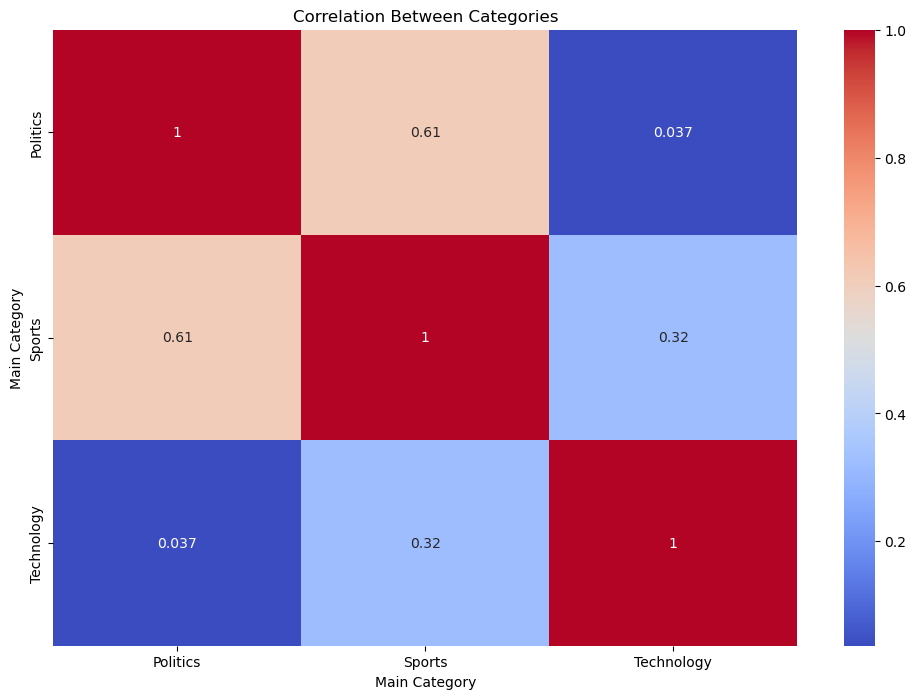

In [195]:
plt.figure(figsize=(12, 8))
sns.heatmap(category_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Categories')
plt.show()

# Relationship between News Categories and Date

Trend over time for specific category

In [196]:
# Count occurrences of each category over time
category_trend = df_exploded.groupby(['Date', 'Main Category']).size().reset_index(name='Count')

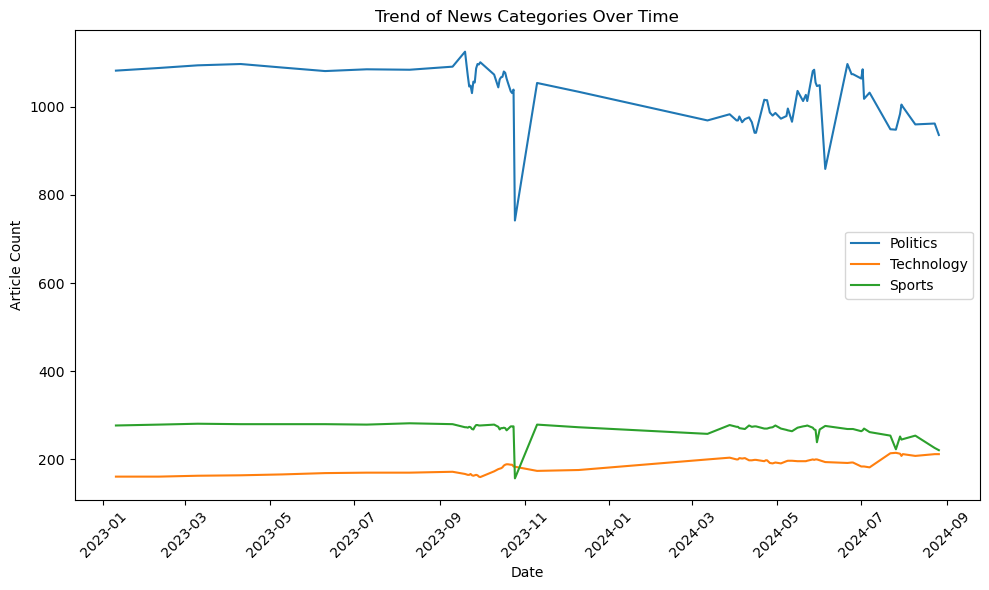

In [197]:
# Plot trend for a specific category
plt.figure(figsize=(10, 6))
for category in categories_to_keep.keys():  # Iterate through main categories
    trend = category_trend[category_trend['Main Category'] == category]
    plt.plot(trend['Date'], trend['Count'], label=category)

plt.xlabel('Date')
plt.ylabel('Article Count')
plt.title('Trend of News Categories Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Engineering

Text-Based Features

In [198]:
#Headline and content length
df['Headline Length'] = df['Headline'].str.len()
df['Content Length'] = df['Content'].str.len()

In [199]:
(df[['Headline', 'Content', 'Headline Length', 'Content Length']].head())

,Headline,Content,Headline Length,Content Length
0,कांग्रेस नेता बलजिंदर सिंह की पंजाब में घर के ...,कांग्रेस नेता बलजिंदर सिंह की सोमवार को पंजाब ...,73,288
3,तमिलनाडु में शावरमा खाने से 14 वर्षीय छात्रा क...,नामक्कल (तमिलनाडु) में शावरमा खाने से सोमवार क...,74,300
4,मणिपुर में मुख्यमंत्री के आश्वासन के बाद मारे ...,मणिपुर के मुख्यमंत्री एन बीरेन सिंह के आश्वासन...,88,308
5,लोकसभा और विधानसभाओं में महिलाओं को 33% आरक्षण...,"रिपोर्ट्स के अनुसार, केंद्रीय कैबिनेट ने सोमवा...",96,343
6,भारत के लिए गौरव की बात: होयसल मंदिरों के वर्ल...,कर्नाटक के होयसल साम्राज्य के मंदिरों को यूनेस...,92,309


In [200]:
#Word Count
df['Headline Word Count'] = df['Headline'].str.split().apply(len)
df['Content Word Count'] = df['Content'].str.split().apply(len)

In [201]:
(df[['Headline', 'Content', 'Headline Word Count', 'Content Word Count']].head())

,Headline,Content,Headline Word Count,Content Word Count
0,कांग्रेस नेता बलजिंदर सिंह की पंजाब में घर के ...,कांग्रेस नेता बलजिंदर सिंह की सोमवार को पंजाब ...,15,59
3,तमिलनाडु में शावरमा खाने से 14 वर्षीय छात्रा क...,नामक्कल (तमिलनाडु) में शावरमा खाने से सोमवार क...,15,59
4,मणिपुर में मुख्यमंत्री के आश्वासन के बाद मारे ...,मणिपुर के मुख्यमंत्री एन बीरेन सिंह के आश्वासन...,18,60
5,लोकसभा और विधानसभाओं में महिलाओं को 33% आरक्षण...,"रिपोर्ट्स के अनुसार, केंद्रीय कैबिनेट ने सोमवा...",17,60
6,भारत के लिए गौरव की बात: होयसल मंदिरों के वर्ल...,कर्नाटक के होयसल साम्राज्य के मंदिरों को यूनेस...,19,56


In [202]:
#Avearge headlline and content word count
average_headline_word_count = round(df['Headline Word Count'].mean())
average_content_word_count = round(df['Content Word Count'].mean())

In [203]:
print(f"Average headline word count is {average_headline_word_count}")
print(f"Average content word count is {average_content_word_count}")

Average headline word count is 15
Average content word count is 59


In [204]:
#Sentiment Analysis
!pip install textblob

In [205]:
from textblob import TextBlob

In [206]:
df['Headline Sentiment'] = df['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Content Sentiment'] = df['Content'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [207]:
(df[['Headline', 'Content', 'Headline Sentiment', 'Content Sentiment']].head(30))

,Headline,Content,Headline Sentiment,Content Sentiment
0,कांग्रेस नेता बलजिंदर सिंह की पंजाब में घर के ...,कांग्रेस नेता बलजिंदर सिंह की सोमवार को पंजाब ...,0.0,0.0
3,तमिलनाडु में शावरमा खाने से 14 वर्षीय छात्रा क...,नामक्कल (तमिलनाडु) में शावरमा खाने से सोमवार क...,0.0,0.0
4,मणिपुर में मुख्यमंत्री के आश्वासन के बाद मारे ...,मणिपुर के मुख्यमंत्री एन बीरेन सिंह के आश्वासन...,0.0,0.0
5,लोकसभा और विधानसभाओं में महिलाओं को 33% आरक्षण...,"रिपोर्ट्स के अनुसार, केंद्रीय कैबिनेट ने सोमवा...",0.0,0.0
6,भारत के लिए गौरव की बात: होयसल मंदिरों के वर्ल...,कर्नाटक के होयसल साम्राज्य के मंदिरों को यूनेस...,0.0,0.0
7,कोटा में एनईईटी की तैयारी कर रही यूपी की 17 वर...,कोटा (राजस्थान) में सोमवार को एनईईटी की तैयारी...,0.0,0.0
8,डेढ़ घंटे चलने के बाद खत्म हुई केंद्रीय कैबिन...,सोमवार को संसद के एनेक्सी भवन में आयोजित केंद्...,0.0,0.0
9,यूपी में चिकित्सा शिक्षा विभाग में ₹400 करोड़ ...,समाजवादी पार्टी (सपा) ने एक मीडिया रिपोर्ट के ...,0.0,0.0
10,यूपी में महिला ने पति पर लगाया नपुंसक होने का ...,आगरा (उत्तर प्रदेश) में एक महिला ने अपने पति प...,0.0,0.0
12,यूपी के लखीमपुर खीरी हिंसा मामले की जांच कर रह...,लखीमपुर खीरी (यूपी) हिंसा मामले की जांच के लिए...,0.0,0.0


In [208]:
(df[['Headline', 'Content', 'Headline Sentiment', 'Content Sentiment']].tail(30))

,Headline,Content,Headline Sentiment,Content Sentiment
185313,यूपी में गाय के साथ अप्राकृतिक दुष्कर्म के आरो...,हापुड़ (यूपी) में गौशाला में गाय के साथ अप्राक...,0.0,0.0
185322,सुकमा में शहीद हुए 7 भाइयों की प्रतिमाओं को रा...,छत्तीसगढ़ के सुकमा में अलग-अलग नक्सली हमलों मे...,0.0,0.0
185329,"बेंगलुरु में फ्लाईओवर पर टकराईं कई गाड़ियां, का...",बेंगलुरु (कर्नाटक) में इलेक्ट्रॉनिक सिटी फ्लाई...,0.0,0.0
185341,बिहार में 3 बच्चों व 2 महिलाओं को बैठाकर बाइक ...,एक बाइक पर सवार होकर जाते 6 लोगों का वीडियो सो...,0.0,0.0
185350,'पंचायत-3' के सीन की तरह छत्तीसगढ़ में एसपी का...,वेब सीरीज़ 'पंचायत-3' के सीन की तरह मुंगेली (छत...,0.0,0.0
185362,बाइकर्स के स्टंट से नाराज़ लोगों ने कर्नाटक मे...,नेलमंगला (कर्नाटक) में कुछ बाइकर्स के स्टंट से...,0.0,0.0
185389,एमपी में राशन दुकान में चोरी करने घुसा चोर अंद...,मंदसौर (मध्य प्रदेश) में गुरुवार रात एक सरकारी...,0.0,0.0
185396,एआई में पिछड़ने के लिए गूगल की वर्क फ्रॉम होम ...,गूगल के पूर्व सीईओ एरिक श्मिट का मानना ​​है कि...,0.0,0.0
185397,यूपी में सरकारी फाइलों में छेड़छाड़ कर करोड़पत...,यूपी के गोंडा में एक सफाईकर्मी अचानक करोड़पति ...,0.0,0.0
185398,"डेंगू वैक्सीन के तीसरे चरण का ट्रायल हुआ शुरू,...",बाज़ार में जल्द ही डेंगू की वैक्सीन उपलब्ध हो ...,0.0,0.0


In [209]:
df.head()

,Headline,Content,News Categories,Date,Main Category,Headline Length,Content Length,Headline Word Count,Content Word Count,Headline Sentiment,Content Sentiment
0,कांग्रेस नेता बलजिंदर सिंह की पंजाब में घर के ...,कांग्रेस नेता बलजिंदर सिंह की सोमवार को पंजाब ...,[national],2023-09-19,Politics,73,288,15,59,0.0,0.0
3,तमिलनाडु में शावरमा खाने से 14 वर्षीय छात्रा क...,नामक्कल (तमिलनाडु) में शावरमा खाने से सोमवार क...,[national],2023-09-19,Politics,74,300,15,59,0.0,0.0
4,मणिपुर में मुख्यमंत्री के आश्वासन के बाद मारे ...,मणिपुर के मुख्यमंत्री एन बीरेन सिंह के आश्वासन...,[national],2023-09-19,Politics,88,308,18,60,0.0,0.0
5,लोकसभा और विधानसभाओं में महिलाओं को 33% आरक्षण...,"रिपोर्ट्स के अनुसार, केंद्रीय कैबिनेट ने सोमवा...",[national],2023-09-19,Politics,96,343,17,60,0.0,0.0
6,भारत के लिए गौरव की बात: होयसल मंदिरों के वर्ल...,कर्नाटक के होयसल साम्राज्य के मंदिरों को यूनेस...,[national],2023-09-19,Politics,92,309,19,56,0.0,0.0


In [210]:
df = df.reset_index(drop=True)

In [211]:
df.head()

,Headline,Content,News Categories,Date,Main Category,Headline Length,Content Length,Headline Word Count,Content Word Count,Headline Sentiment,Content Sentiment
0,कांग्रेस नेता बलजिंदर सिंह की पंजाब में घर के ...,कांग्रेस नेता बलजिंदर सिंह की सोमवार को पंजाब ...,[national],2023-09-19,Politics,73,288,15,59,0.0,0.0
1,तमिलनाडु में शावरमा खाने से 14 वर्षीय छात्रा क...,नामक्कल (तमिलनाडु) में शावरमा खाने से सोमवार क...,[national],2023-09-19,Politics,74,300,15,59,0.0,0.0
2,मणिपुर में मुख्यमंत्री के आश्वासन के बाद मारे ...,मणिपुर के मुख्यमंत्री एन बीरेन सिंह के आश्वासन...,[national],2023-09-19,Politics,88,308,18,60,0.0,0.0
3,लोकसभा और विधानसभाओं में महिलाओं को 33% आरक्षण...,"रिपोर्ट्स के अनुसार, केंद्रीय कैबिनेट ने सोमवा...",[national],2023-09-19,Politics,96,343,17,60,0.0,0.0
4,भारत के लिए गौरव की बात: होयसल मंदिरों के वर्ल...,कर्नाटक के होयसल साम्राज्य के मंदिरों को यूनेस...,[national],2023-09-19,Politics,92,309,19,56,0.0,0.0


Date-Based Features

In [212]:
#Day, Month, Year, Weekday
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

In [213]:
df.tail()

,Headline,Content,News Categories,Date,Main Category,Headline Length,Content Length,Headline Word Count,Content Word Count,Headline Sentiment,Content Sentiment,Year,Month,Day,Weekday
121324,यूपी के शख्स ने अपने शरीर पर गुदवाएं हैं 600 स...,हापुड़ (यूपी) के अभिषेक गौतम नामक शख्स ने अपने...,"[miscellaneous, national]",2024-08-26,Politics,68,314,15,60,0.0,0.0,2024,8,26,0
121325,अनंत अंबानी और राधिका मर्चेंट ने अपने हनीमून क...,अनंत अंबानी और राधिका मर्चेंट ने पनामा में हनी...,"[miscellaneous, world]",2024-08-26,Politics,87,302,16,59,0.0,0.0,2024,8,26,0
121326,गुरुग्राम में थार व स्कॉर्पियो से सड़क पर स्टं...,गुरुग्राम (हरियाणा) में थार व स्कॉर्पियो से सड...,"[miscellaneous, national]",2024-08-26,Politics,72,268,14,57,0.0,0.0,2024,8,26,0
121327,प्राइवेट पार्टी में डांस करते हुए पिस्टल लहरात...,दिल्ली की तिहाड़ जेल के जेलर दीपक शर्मा का एक ...,"[miscellaneous, national]",2024-08-26,Politics,83,316,16,59,0.0,0.0,2024,8,26,0
121328,आज ही के दिन यूएस ने 1945 में जापान के नागासाक...,अमेरिका ने 9 अगस्त 1945 को जापान के नागासाकी म...,"[world, miscellaneous]",2024-08-26,Politics,71,269,16,58,0.0,0.0,2024,8,26,0


In [214]:
#Count the Number of Articles by Weekend/Weekday:
df['Is Weekend'] = df['Date'].dt.weekday.isin([5, 6]).astype(int)

In [215]:
weekend_counts = df['Is Weekend'].value_counts().rename({0: 'Weekday', 1: 'Weekend'})
print(weekend_counts) #0:weekdays and 1: weekend

Weekday    97588
Weekend    23741
Name: Is Weekend, dtype: int64


In [216]:
#Analyze News Categories for Weekend vs. Weekday:
category_trends = df.groupby(['Is Weekend', 'Main Category']).size().unstack(fill_value=0)
print(category_trends)

Main Category  Politics  Sports  Technology
Is Weekend                                 
0                 67738   17606       12244
1                 16480    4347        2914


In [217]:
sentiment_trends = df.groupby('Is Weekend')[['Headline Sentiment', 'Content Sentiment']].mean()
print(sentiment_trends)

            Headline Sentiment  Content Sentiment
Is Weekend                                       
0                     0.000146           0.000313
1                     0.000167           0.000336


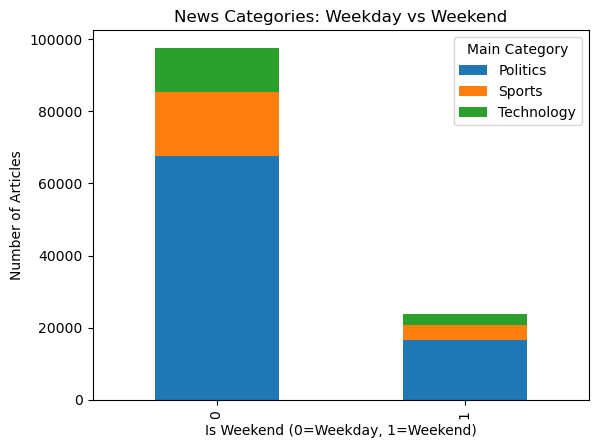

In [218]:
category_trends.plot(kind='bar', stacked=True)
plt.title('News Categories: Weekday vs Weekend')
plt.xlabel('Is Weekend (0=Weekday, 1=Weekend)')
plt.ylabel('Number of Articles')
plt.show()

In [219]:
# Add total articles count per weekend/weekday to the dataframe
df['Total Articles Weekday'] = (df['Is Weekend'] == 0).sum()
df['Total Articles Weekend'] = (df['Is Weekend'] == 1).sum()


In [220]:
# Add average sentiment trends if sentiment analysis is done
if 'Headline Sentiment' in df.columns and 'Content Sentiment' in df.columns:
    avg_sentiment = df.groupby('Is Weekend')[['Headline Sentiment', 'Content Sentiment']].transform('mean')
    df['Avg Headline Sentiment'] = avg_sentiment['Headline Sentiment']
    df['Avg Content Sentiment'] = avg_sentiment['Content Sentiment']

In [227]:
df.head()

,Headline,Content,News Categories,Date,Main Category,Headline Length,Content Length,Headline Word Count,Content Word Count,Headline Sentiment,...,Month,Day,Weekday,Is Weekend,Total Articles Weekday,Total Articles Weekend,Avg Headline Sentiment,Avg Content Sentiment,Days Since Start,Category Encoded
0,कांग्रेस नेता बलजिंदर सिंह की पंजाब में घर के ...,कांग्रेस नेता बलजिंदर सिंह की सोमवार को पंजाब ...,[national],2023-09-19,Politics,73,288,15,59,0.0,...,9,19,1,0,97588,23741,0.000146,0.000313,252,0
1,तमिलनाडु में शावरमा खाने से 14 वर्षीय छात्रा क...,नामक्कल (तमिलनाडु) में शावरमा खाने से सोमवार क...,[national],2023-09-19,Politics,74,300,15,59,0.0,...,9,19,1,0,97588,23741,0.000146,0.000313,252,0
2,मणिपुर में मुख्यमंत्री के आश्वासन के बाद मारे ...,मणिपुर के मुख्यमंत्री एन बीरेन सिंह के आश्वासन...,[national],2023-09-19,Politics,88,308,18,60,0.0,...,9,19,1,0,97588,23741,0.000146,0.000313,252,0
3,लोकसभा और विधानसभाओं में महिलाओं को 33% आरक्षण...,"रिपोर्ट्स के अनुसार, केंद्रीय कैबिनेट ने सोमवा...",[national],2023-09-19,Politics,96,343,17,60,0.0,...,9,19,1,0,97588,23741,0.000146,0.000313,252,0
4,भारत के लिए गौरव की बात: होयसल मंदिरों के वर्ल...,कर्नाटक के होयसल साम्राज्य के मंदिरों को यूनेस...,[national],2023-09-19,Politics,92,309,19,56,0.0,...,9,19,1,0,97588,23741,0.000146,0.000313,252,0


In [228]:
#Time Since Event
df['Days Since Start'] = (df['Date'] - df['Date'].min()).dt.days


In [229]:
df.head()

,Headline,Content,News Categories,Date,Main Category,Headline Length,Content Length,Headline Word Count,Content Word Count,Headline Sentiment,...,Month,Day,Weekday,Is Weekend,Total Articles Weekday,Total Articles Weekend,Avg Headline Sentiment,Avg Content Sentiment,Days Since Start,Category Encoded
0,कांग्रेस नेता बलजिंदर सिंह की पंजाब में घर के ...,कांग्रेस नेता बलजिंदर सिंह की सोमवार को पंजाब ...,[national],2023-09-19,Politics,73,288,15,59,0.0,...,9,19,1,0,97588,23741,0.000146,0.000313,252,0
1,तमिलनाडु में शावरमा खाने से 14 वर्षीय छात्रा क...,नामक्कल (तमिलनाडु) में शावरमा खाने से सोमवार क...,[national],2023-09-19,Politics,74,300,15,59,0.0,...,9,19,1,0,97588,23741,0.000146,0.000313,252,0
2,मणिपुर में मुख्यमंत्री के आश्वासन के बाद मारे ...,मणिपुर के मुख्यमंत्री एन बीरेन सिंह के आश्वासन...,[national],2023-09-19,Politics,88,308,18,60,0.0,...,9,19,1,0,97588,23741,0.000146,0.000313,252,0
3,लोकसभा और विधानसभाओं में महिलाओं को 33% आरक्षण...,"रिपोर्ट्स के अनुसार, केंद्रीय कैबिनेट ने सोमवा...",[national],2023-09-19,Politics,96,343,17,60,0.0,...,9,19,1,0,97588,23741,0.000146,0.000313,252,0
4,भारत के लिए गौरव की बात: होयसल मंदिरों के वर्ल...,कर्नाटक के होयसल साम्राज्य के मंदिरों को यूनेस...,[national],2023-09-19,Politics,92,309,19,56,0.0,...,9,19,1,0,97588,23741,0.000146,0.000313,252,0


In [224]:
df.tail()

,Headline,Content,News Categories,Date,Main Category,Headline Length,Content Length,Headline Word Count,Content Word Count,Headline Sentiment,...,Year,Month,Day,Weekday,Is Weekend,Total Articles Weekday,Total Articles Weekend,Avg Headline Sentiment,Avg Content Sentiment,Days Since Start
121324,यूपी के शख्स ने अपने शरीर पर गुदवाएं हैं 600 स...,हापुड़ (यूपी) के अभिषेक गौतम नामक शख्स ने अपने...,"[miscellaneous, national]",2024-08-26,Politics,68,314,15,60,0.0,...,2024,8,26,0,0,97588,23741,0.000146,0.000313,594
121325,अनंत अंबानी और राधिका मर्चेंट ने अपने हनीमून क...,अनंत अंबानी और राधिका मर्चेंट ने पनामा में हनी...,"[miscellaneous, world]",2024-08-26,Politics,87,302,16,59,0.0,...,2024,8,26,0,0,97588,23741,0.000146,0.000313,594
121326,गुरुग्राम में थार व स्कॉर्पियो से सड़क पर स्टं...,गुरुग्राम (हरियाणा) में थार व स्कॉर्पियो से सड...,"[miscellaneous, national]",2024-08-26,Politics,72,268,14,57,0.0,...,2024,8,26,0,0,97588,23741,0.000146,0.000313,594
121327,प्राइवेट पार्टी में डांस करते हुए पिस्टल लहरात...,दिल्ली की तिहाड़ जेल के जेलर दीपक शर्मा का एक ...,"[miscellaneous, national]",2024-08-26,Politics,83,316,16,59,0.0,...,2024,8,26,0,0,97588,23741,0.000146,0.000313,594
121328,आज ही के दिन यूएस ने 1945 में जापान के नागासाक...,अमेरिका ने 9 अगस्त 1945 को जापान के नागासाकी म...,"[world, miscellaneous]",2024-08-26,Politics,71,269,16,58,0.0,...,2024,8,26,0,0,97588,23741,0.000146,0.000313,594


Category based features

In [226]:
#Category Encoding
df['Category Encoded'] = LabelEncoder().fit_transform(df['Main Category'])

In [230]:
df['Headline/Content Length Ratio'] = df['Headline Length'] / df['Content Length']

In [231]:
df.head()

,Headline,Content,News Categories,Date,Main Category,Headline Length,Content Length,Headline Word Count,Content Word Count,Headline Sentiment,...,Day,Weekday,Is Weekend,Total Articles Weekday,Total Articles Weekend,Avg Headline Sentiment,Avg Content Sentiment,Days Since Start,Category Encoded,Headline/Content Length Ratio
0,कांग्रेस नेता बलजिंदर सिंह की पंजाब में घर के ...,कांग्रेस नेता बलजिंदर सिंह की सोमवार को पंजाब ...,[national],2023-09-19,Politics,73,288,15,59,0.0,...,19,1,0,97588,23741,0.000146,0.000313,252,0,0.253472
1,तमिलनाडु में शावरमा खाने से 14 वर्षीय छात्रा क...,नामक्कल (तमिलनाडु) में शावरमा खाने से सोमवार क...,[national],2023-09-19,Politics,74,300,15,59,0.0,...,19,1,0,97588,23741,0.000146,0.000313,252,0,0.246667
2,मणिपुर में मुख्यमंत्री के आश्वासन के बाद मारे ...,मणिपुर के मुख्यमंत्री एन बीरेन सिंह के आश्वासन...,[national],2023-09-19,Politics,88,308,18,60,0.0,...,19,1,0,97588,23741,0.000146,0.000313,252,0,0.285714
3,लोकसभा और विधानसभाओं में महिलाओं को 33% आरक्षण...,"रिपोर्ट्स के अनुसार, केंद्रीय कैबिनेट ने सोमवा...",[national],2023-09-19,Politics,96,343,17,60,0.0,...,19,1,0,97588,23741,0.000146,0.000313,252,0,0.279883
4,भारत के लिए गौरव की बात: होयसल मंदिरों के वर्ल...,कर्नाटक के होयसल साम्राज्य के मंदिरों को यूनेस...,[national],2023-09-19,Politics,92,309,19,56,0.0,...,19,1,0,97588,23741,0.000146,0.000313,252,0,0.297735


Aggregate Feature

In [232]:
#Rolling Averages and Trends : analyze short term and long term trends
df['Category Rolling Average'] = df.groupby('Main Category')['Headline Length'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean())



In [233]:
df.head()

,Headline,Content,News Categories,Date,Main Category,Headline Length,Content Length,Headline Word Count,Content Word Count,Headline Sentiment,...,Weekday,Is Weekend,Total Articles Weekday,Total Articles Weekend,Avg Headline Sentiment,Avg Content Sentiment,Days Since Start,Category Encoded,Headline/Content Length Ratio,Category Rolling Average
0,कांग्रेस नेता बलजिंदर सिंह की पंजाब में घर के ...,कांग्रेस नेता बलजिंदर सिंह की सोमवार को पंजाब ...,[national],2023-09-19,Politics,73,288,15,59,0.0,...,1,0,97588,23741,0.000146,0.000313,252,0,0.253472,73.000000
1,तमिलनाडु में शावरमा खाने से 14 वर्षीय छात्रा क...,नामक्कल (तमिलनाडु) में शावरमा खाने से सोमवार क...,[national],2023-09-19,Politics,74,300,15,59,0.0,...,1,0,97588,23741,0.000146,0.000313,252,0,0.246667,73.500000
2,मणिपुर में मुख्यमंत्री के आश्वासन के बाद मारे ...,मणिपुर के मुख्यमंत्री एन बीरेन सिंह के आश्वासन...,[national],2023-09-19,Politics,88,308,18,60,0.0,...,1,0,97588,23741,0.000146,0.000313,252,0,0.285714,78.333333
3,लोकसभा और विधानसभाओं में महिलाओं को 33% आरक्षण...,"रिपोर्ट्स के अनुसार, केंद्रीय कैबिनेट ने सोमवा...",[national],2023-09-19,Politics,96,343,17,60,0.0,...,1,0,97588,23741,0.000146,0.000313,252,0,0.279883,82.750000
4,भारत के लिए गौरव की बात: होयसल मंदिरों के वर्ल...,कर्नाटक के होयसल साम्राज्य के मंदिरों को यूनेस...,[national],2023-09-19,Politics,92,309,19,56,0.0,...,1,0,97588,23741,0.000146,0.000313,252,0,0.297735,84.600000


In [234]:
#Event Counts: tracks the density of the articles fro specific time period
df['Articles Per Day'] = df.groupby('Date')['Headline'].transform('count')


In [235]:
df.tail()

,Headline,Content,News Categories,Date,Main Category,Headline Length,Content Length,Headline Word Count,Content Word Count,Headline Sentiment,...,Is Weekend,Total Articles Weekday,Total Articles Weekend,Avg Headline Sentiment,Avg Content Sentiment,Days Since Start,Category Encoded,Headline/Content Length Ratio,Category Rolling Average,Articles Per Day
121324,यूपी के शख्स ने अपने शरीर पर गुदवाएं हैं 600 स...,हापुड़ (यूपी) के अभिषेक गौतम नामक शख्स ने अपने...,"[miscellaneous, national]",2024-08-26,Politics,68,314,15,60,0.0,...,0,97588,23741,0.000146,0.000313,594,0,0.216561,80.285714,1369
121325,अनंत अंबानी और राधिका मर्चेंट ने अपने हनीमून क...,अनंत अंबानी और राधिका मर्चेंट ने पनामा में हनी...,"[miscellaneous, world]",2024-08-26,Politics,87,302,16,59,0.0,...,0,97588,23741,0.000146,0.000313,594,0,0.288079,81.571429,1369
121326,गुरुग्राम में थार व स्कॉर्पियो से सड़क पर स्टं...,गुरुग्राम (हरियाणा) में थार व स्कॉर्पियो से सड...,"[miscellaneous, national]",2024-08-26,Politics,72,268,14,57,0.0,...,0,97588,23741,0.000146,0.000313,594,0,0.268657,81.142857,1369
121327,प्राइवेट पार्टी में डांस करते हुए पिस्टल लहरात...,दिल्ली की तिहाड़ जेल के जेलर दीपक शर्मा का एक ...,"[miscellaneous, national]",2024-08-26,Politics,83,316,16,59,0.0,...,0,97588,23741,0.000146,0.000313,594,0,0.262658,80.428571,1369
121328,आज ही के दिन यूएस ने 1945 में जापान के नागासाक...,अमेरिका ने 9 अगस्त 1945 को जापान के नागासाकी म...,"[world, miscellaneous]",2024-08-26,Politics,71,269,16,58,0.0,...,0,97588,23741,0.000146,0.000313,594,0,0.263941,77.714286,1369


In [236]:
#Clustering features
##TOPIC MODELING : Unsupervised extraction of underlying themes.
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import parallel_backend
from sklearn.decomposition import PCA

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Content'])
lda = LatentDirichletAllocation(n_components=5)
df['Topic'] = lda.fit_transform(X).argmax(axis=1)

In [ ]:
#from sklearn.cluster import AgglomerativeClustering
# Apply PCA to reduce dimensions
#pca = PCA(n_components=10)  # You can adjust n_components based on variance explained
#X_reduced = pca.fit_transform(X)

# Perform Agglomerative Clustering on reduced data
#agg_clust = AgglomerativeClustering(n_clusters=5)
#df['Cluster'] = agg_clust.fit_predict(X_reduced)

In [ ]:
df.head()

In [ ]:
df.to_csv('Inshort_cleaned.csv', index=False)

In [ ]:
df['News Categories'] = df['News Categories'].astype(str)
df['Headline'] = df['Headline'].astype(str)
# TF-IDF Vectorization for Headline and News Category
tfidf_headline = TfidfVectorizer(max_features=5000)
tfidf_news_category = TfidfVectorizer(max_features=5000)
X_headline = tfidf_headline.fit_transform(df['Headline'])
X_news_category = tfidf_news_category.fit_transform(df['News Categories'])


In [ ]:
from scipy.sparse import hstack
X_combined = hstack([X_news_categories, X_headline])

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Main Category'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

In [ ]:
# Train SVM model
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

In [ ]:
!pip install tiktoken sentencepiece

In [ ]:
#tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
#model = AutoModel.from_pretrained("bert-base-multilingual-cased")

In [ ]:
# Tokenize and encode text
#def encode_text(texts):
 #   inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
  #  outputs = model(**inputs)
   # return outputs.last_hidden_state.mean(dim=1).detach().numpy()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'hindi_news_svm.pkl')
joblib.dump(label_encoder, 'label_encoder_main_category.pkl')
joblib.dump(tfidf_headline, 'tfidf_vectorizer_headline.pkl')
joblib.dump(tfidf_news_category, 'tfidf_vectorizer_news_category.pkl')

In [ ]:
# Load the saved models and encoders
model = joblib.load('hindi_news_svm.pkl')
encoder_main_category = joblib.load('label_encoder_main_category.pkl')
tfidf_headline = joblib.load('tfidf_vectorizer_headline.pkl')
tfidf_news_category = joblib.load('tfidf_vectorizer_news_category.pkl')

In [ ]:
# Function to predict the Main Category
def predict_main_category(headline, news_category):
    # Transform the input headline and news category using the loaded TF-IDF vectorizers
    headline_tfidf = tfidf_headline.transform([headline])
    news_category_tfidf = tfidf_news_category.transform([news_category])
    
    # Combine the transformed features
    combined_features = sp.hstack((headline_tfidf, news_category_tfidf))
    
    # Predict the main category using the trained model
    y_pred = model.predict(combined_features)
    
    # Decode the predicted category using the label encoder
    predicted_category = encoder_main_category.inverse_transform(y_pred)
    
    return predicted_category[0]

# Taking user input for headline and news category
headline_input = input("Enter the headline: ")
news_category_input = input("Enter the news category: ")

# Predict the main category
predicted_category = predict_main_category(headline_input, news_category_input)

# Output the predicted main category
print(f"Predicted Main Category: {predicted_category}")